# BioE103 Assignment 2: Nervous System

### Hannah Schofield

### <font color='blue'> Tuesday, May 12 at 10 AM </font>

In [1]:
# This block will import the python libraries and functions used in this assignment
# You will specifically be using plt and curve_fit

import os # os is a library that helps load and write files
import pdb # pdb is a helpful debugging library
import numpy as np # used for defining arrays
import matplotlib.pyplot as plt # plt is a frequently used plotting function
import scipy.integrate as integrate # used to solve differential equations
from scipy.integrate import odeint
from scipy.optimize import curve_fit # used to fit a function to some data
from scipy.io import loadmat # used to import .mat files
import scipy.signal # signal processing library containing filter functions
from scipy.io import loadmat # used to import .mat files

from scipy.stats import skew, kurtosis
from sklearn import preprocessing, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##  Problem 1

In Problem 1, we will simulate action potentials using the Hodgkin-Huxley model.

![title](imgs/HH.png)

<img src="imgs/HHtable.png"  width="600"/>

$C_m$ = 1 $uF/cm^2$.  $\bar g_K$ , $\bar g_{Na}$, and $\bar g_L$ are the constant components of the potassium, sodium, and leak current conductances and have values 36, 120, and 0.3 $mS/cm^2$, respectively. $V_K$, $V_{Na}$, and $V_L$ have values of  -12, 115, and 10.6 mV, respectively.


###  Calculate alpha, Beta, n, m, h

Complete the function below that calculates n, m, and h based on the provided $\alpha$ and $\beta$ rate constants. In order to derive equations for n, m, and h, assume the system is initially at steady state and that $\frac{dn}{dt}$, $\frac{dm}{dt}$, and $\frac{dh}{dt}$ are equal to zero. Use these functions to find the initial values for n, m, and h when V = 0.

In [2]:
### GRADED 
# 1A - 1 pt

def evaluateAlphaBeta(V):
    an = 0.01*(10-V)/(np.exp((10-V)/10)-1)
    am = 0.1*(25-V)/(np.exp((25-V)/10)-1)
    ah = 0.07*np.exp(-V/20)
    
    Bn = 0.125*np.exp(-V/80)
    Bm = 4*np.exp(-V/18)
    Bh = 1/(np.exp((30-V)/10) + 1)
    
    return an, am, ah, Bn, Bm, Bh

### START CODE HERE ###
def evaluateNMH(an, am, ah, Bn, Bm, Bh):
    n = an/(an + Bn)
    m = am/(am + Bm)
    h = ah/(ah + Bh)
    return n, m, h

# Add code here to print out the initial values for n, m, and h
init_V = evaluateAlphaBeta(0)
print(init_V)
result = evaluateNMH(init_V[0], init_V[1], init_V[2], init_V[3], init_V[4], init_V[5])
print(result)

### END CODE HERE ###

(0.05819767068693265, 0.22356372458463003, 0.07, 0.125, 4.0, 0.04742587317756678)
(0.3176769140606974, 0.05293248525724958, 0.5961207535084603)


In [3]:
# Sanity checks for part 1A
print("Confirm that your above output is similar, if not the same, to the expected output:")
print("an0, am0, ah0, Bn0, Bm0, Bh0:")
print(0.05819767068693265, 0.22356372458463003, 0.07, 0.125, 4.0, 0.04742587317756678)
print("n0,m0,h0:")
print(0.3176769140606974, 0.05293248525724958, 0.5961207535084603)

Confirm that your above output is similar, if not the same, to the expected output:
an0, am0, ah0, Bn0, Bm0, Bh0:
0.05819767068693265 0.22356372458463003 0.07 0.125 4.0 0.04742587317756678
n0,m0,h0:
0.3176769140606974 0.05293248525724958 0.5961207535084603


###  Simulate an action-potential with the Hodgkin-Huxley Model

Let's simulate an action-potential using the HHmodel function. This function takes in as input t, the time vector to simulate the action potential over, initial conditions for V, n, m, and h, and Iapp, the applied current. Use odeint to approximate the action-potential values for V, n, m, and h over the time vector t. Assume Iapp = 0 and use the initial values for n, m, and h that you found in part A. The initial value for V can be set to 8 mV. You will be simulating from 0 to 20 ms and produce two plots: one for V(t); one for n(t), m(t), and h(t) all in the same plot.

Hint: You will be defining another function within HHmodel that calculates the system of ODEs to be solved by odeint. For a refresher on odeint, see the [odeint documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

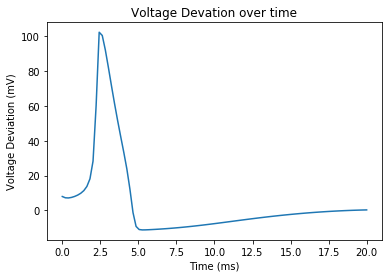

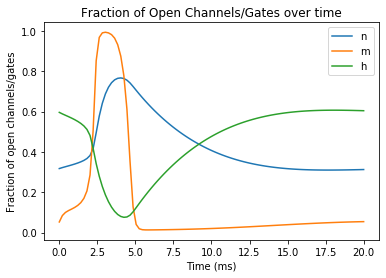

In [4]:
### GRADED 
# 1B - 4 pts

def HHmodel(t, V0, n0, m0, h0, Iapp = 0):

    ### START CODE HERE ### 
    
    def ODEs(y,t): 
        V, n, m, h = y[0], y[1], y[2], y[3] 
        an, am, ah, Bn, Bm, Bh = evaluateAlphaBeta(V)
        dvdt = -36 * (n**4) * (V + 12) - 120* (m**3)*h*(V - 115) - .3 * (V - 10.6) + Iapp
        dndt = an*(1 - n) - Bn*n
        dmdt = am*(1 - m) - Bm*m
        dhdt = ah*(1 - h) - Bh*h
        return dvdt, dndt, dmdt, dhdt

    y0 = [V0, n0, m0, h0]
    res = odeint(ODEs, y0, t)
    Vout = res[:,0]
    nout = res[:,1]
    mout = res[:,2]
    hout = res[:,3]
    
    return Vout, nout, mout, hout

# Below, you will need to create a time variable t from 0-20 ms and obtain V(t), n(t), m(t), and h(t) through
# HHmodel. You will then plot two separate plots: one for V(t) AND one for n(t), m(t), and h(t). 
### Start Code ###

V0 = 8 
n0 = 0.3176769140606974
m0 = 0.05293248525724958
h0 = 0.5961207535084603

t = np.linspace(0,20,100) 
sol = HHmodel(t, V0, n0, m0, h0, Iapp = 0) 

V = sol[0]
n = sol[1]
m = sol[2]
h = sol[3]

#Plot V 
plt.figure(1)
plt.plot(t, V)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage Deviation (mV)")
plt.title("Voltage Devation over time")

#Plot n 
plt.figure(2)
plt.plot(t, n)
#Plot m
plt.plot(t, m)
#Plot h
plt.plot(t, h)
plt.xlabel("Time (ms)")
plt.ylabel("Fraction of open channels/gates")
plt.title("Fraction of Open Channels/Gates over time")
plt.legend(["n", "m", "h"])

### End Code ###

###  Plot sodium and potassium conductance

Run code that takes the output of part B and calculates and plots the sodium and potassium conductance over time.

(Text(0.5, 0, 'Time (ms)'),
 Text(0, 0.5, 'Conductance (mS/cm^2)'),
 <matplotlib.legend.Legend at 0x1a2170a6d0>)

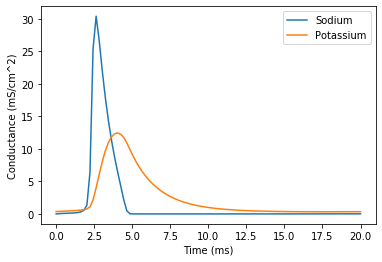

In [5]:
gK = 36
VK = -12
gNa = 120
VNa = 115

KCond = gK*n**4
NaCond = gNa*m**3*h

plt.plot(t,NaCond), plt.plot(t,KCond)
plt.xlabel("Time (ms)"), plt.ylabel("Conductance (mS/cm^2)"), plt.legend(("Sodium","Potassium"))

### 1C - 3 pts (written)

Explain how m and h contribute to sodium conductance and n to potassium conductance. How do the sodium and potassium conductance time courses contribute to the shape of the action potential?

n positively correlates to sodium conductance, when increases (high fraction of open channels) sodium conductance is high. h inhibits sodium conductance, its fraction of open channels decreases as sodium conductance increases & vice versa. An increase in n (high fraction of open channels) potassium conductance is high. 

The increase in sodium conductance is very sudden and correlates with the initial peak of the action potential. The potassium conductance increase occurs later and correlates with the normalization/stabilization of the action potential. 


###  Observe an action-potential at non-resting potential

Using your code from parts B and C, plot the time-course curves for V, n, m, h and sodium and potassium conductance when the initial voltage is 50 mV, you may assume that the initial values for n, m, and h are the same as before.

(Text(0.5, 0, 'Time (ms)'),
 Text(0, 0.5, 'Conductance (mS/cm^2)'),
 <matplotlib.legend.Legend at 0x1a2194fb10>)

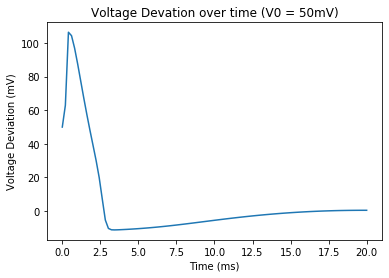

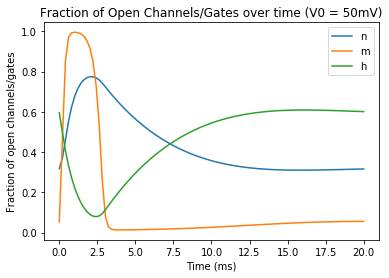

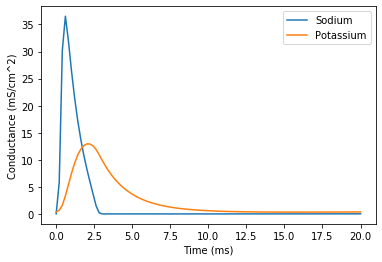

In [6]:
### GRADED 
# 1D - 2 pts (code + written)

### Start Code ###

V0 = 50
n0 = 0.3176769140606974
m0 = 0.05293248525724958
h0 = 0.5961207535084603

t = np.linspace(0,20,100) 
sol = HHmodel(t, V0, n0, m0, h0, Iapp = 0) 

V = sol[0]
n = sol[1]
m = sol[2]
h = sol[3]

#Plot V 
plt.figure(1)
plt.plot(t, V)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage Deviation (mV)")
plt.title("Voltage Devation over time (V0 = 50mV)")

#Plot n 
plt.figure(2)
plt.plot(t, n)
#Plot m
plt.plot(t, m)
#Plot h
plt.plot(t, h)
plt.xlabel("Time (ms)")
plt.ylabel("Fraction of open channels/gates")
plt.title("Fraction of Open Channels/Gates over time (V0 = 50mV)")
plt.legend(["n", "m", "h"])

#Sodium & Potassium Conductances
gK = 36
VK = -12
gNa = 120
VNa = 115

KCond = gK*n**4
NaCond = gNa*m**3*h

plt.figure(3)
plt.plot(t,NaCond), plt.plot(t,KCond)
plt.xlabel("Time (ms)"), plt.ylabel("Conductance (mS/cm^2)"), plt.legend(("Sodium","Potassium"))
### End Code ###

### 1D - 2 pts (written)

What changes do you observe to your plots for V, ​n​, ​m​, and ​h,​ and the sodium and potassium conductances?

The action potential occurs more quickly since the initial V is higher and there is less difference between initial and peak voltage. 
All plots have the same shape, amplitude and correlation between variables, but all plots show a leftward shift, showing that everything happens more quickly with an increase in V from 8 to 50 mV. The time to complete the action potential is decreased. 

###  Observe an action-potential when current is applied to the neuron

Using your code from parts B and C, plot the time-course curves for V, n, m, h and sodium and potassium conductance when the initial voltage is 8 mV and a current of 100 $uA/cm^2$ is applied, you may assume that the initial values for n, m, and h are the same as before. Update your time vector to simulate over 50 ms.

(Text(0.5, 0, 'Time (ms)'),
 Text(0, 0.5, 'Conductance (mS/cm^2)'),
 <matplotlib.legend.Legend at 0x1a21a38cd0>)

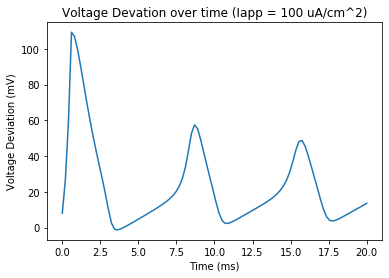

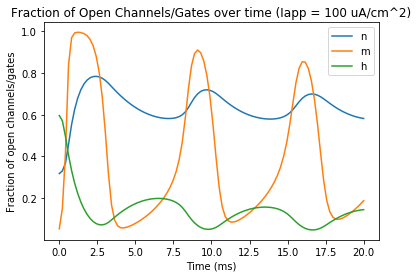

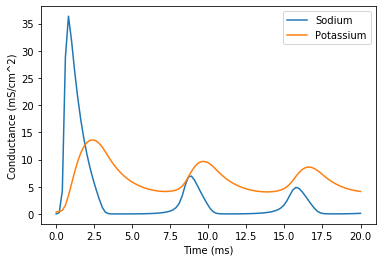

In [7]:
### GRADED 
# 1E - 2 pts (code + written)

### Start Code ###

V0 = 8 
n0 = 0.3176769140606974
m0 = 0.05293248525724958
h0 = 0.5961207535084603

t = np.linspace(0,20,100) 
sol = HHmodel(t, V0, n0, m0, h0, Iapp = 100) 

V = sol[0]
n = sol[1]
m = sol[2]
h = sol[3]

#Plot V 
plt.figure(1)
plt.plot(t, V)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage Deviation (mV)")
plt.title("Voltage Devation over time (Iapp = 100 uA/cm^2)")

#Plot n 
plt.figure(2)
plt.plot(t, n)
#Plot m
plt.plot(t, m)
#Plot h
plt.plot(t, h)
plt.xlabel("Time (ms)")
plt.ylabel("Fraction of open channels/gates")
plt.title("Fraction of Open Channels/Gates over time (Iapp = 100 uA/cm^2)")
plt.legend(["n", "m", "h"])

#Potassium and sodium conductance
gK = 36
VK = -12
gNa = 120
VNa = 115

KCond = gK*n**4
NaCond = gNa*m**3*h
plt.figure(3)
plt.plot(t,NaCond), plt.plot(t,KCond)
plt.xlabel("Time (ms)"), plt.ylabel("Conductance (mS/cm^2)"), plt.legend(("Sodium","Potassium"))

### End Code ###

### 1E - 2 pts (written)

What changes do you observe in your plots for V, ​n,​ ​m​, and ​h​, and sodium and potassium conductances?

This change also results in a leftward shift of all plots. The new applied current results in a repetition of the conductance/open channel patterns so that it repeats several times after the first in shockwave like behavior. The peaks of each occurence decrease over time, showing that a damping effect is acting on the system. The first peak for the initial action potential is considerably higher for all variables. 


##  Problem 2


###  Parameter estimation for potassium conductance

![title](imgs/KCond.png)
![title](imgs/KCondeq.png)

You will be fitting the potassium conductance equation to potassium data extracted from the above plot using the [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function in python. You will be estimating four parameters: two values each of time constants $\tau_n$ and $gK_{\infty}$ corresponding to the two different voltage clamp conditions (25 mV and 0 mV). For the 25 mV phase, assume that $gK_0$ equals $gK_\infty$ from the 0 mV phase. For the 0 mV phase, set $gK_0$ equal to the last conductance value calculated during the 25 mV phase. Note that a 25 mV depolarization lasts 4.9 milliseconds. You should use 0.1 as the initial value for all four parameters. 

You will need to estimate the parameter values for the provided potassium conductance equation using the [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function. Print out your estimated values and plot your predicted potassium conductance against the measured data.

(Text(0.5, 0, 'Time (ms)'),
 Text(0, 0.5, 'Conductance (mS/cm^2)'),
 <matplotlib.legend.Legend at 0x1a21e11650>)

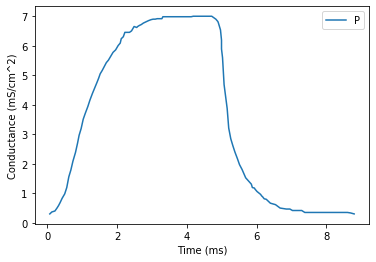

In [8]:
filepath = "Problem2HHData.mat"
data = loadmat(filepath)

Kt = np.squeeze(data["K_Time"])
KCond = np.squeeze(data["K_Conductance"])

plt.figure(), plt.plot(Kt, KCond)
plt.xlabel("Time (ms)"), plt.ylabel("Conductance (mS/cm^2)"), plt.legend(("Potassium"))

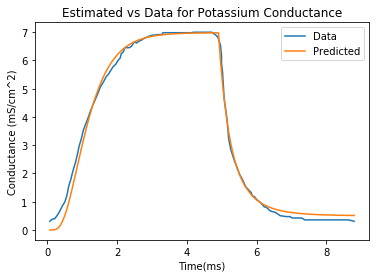

In [9]:
### GRADED
# 2 A continued - 3 pts (code + written)

def func(t, gKinf, gK0, tn25, tn0):
    
    # defines two sub-equations within "func", one that calculates the conductance during the 25 mV phase 
    # and one that calculates the conductance during the 0 mV phase, and concatenates the outputs of these equations 
    # together to get the complete conductance curve
    
    t1 = np.asarray([currt for currt in t if currt < 4.9])
    t2 = np.asarray([currt for currt in t if currt >= 4.9])
    
    gK1 = (gKinf**0.25 - (gKinf**0.25 - gK0**0.25)*np.exp(-(t1-0.5)/(1.7*tn25)))**4
    gK2 = (gK0**0.25 - (gK0**0.25 - gK1[-1]**0.25)*np.exp(-((t2-t2[0]))/(1.7*tn0)))**4
    
    gK = np.concatenate((gK1, gK2))
    
    return gK

### Start Code ###

p0 = [0.1, 0.1, 0.1, 0.1]
bounds = ([0,0,0,0], [8,8,25,25])

popt,pcov = curve_fit(func, Kt, KCond, p0 = p0, bounds = bounds)
predicted = func(Kt, *popt)
          
#Plot 
plt.plot(Kt, KCond)
plt.plot(Kt, predicted)

plt.xlabel("Time(ms)")
plt.ylabel("Conductance (mS/cm^2)")
plt.title("Estimated vs Data for Potassium Conductance") 
plt.legend(["Data", "Predicted"])
### End Code ###

### 2A (written)

Compare your estimated parameters to those given in Figure 2 of the PubMed ID: 12991237 article. Explain any discrepancies.

The estimated parameters match the data very well. The parameters from the figure are 0.09 and 7.09 for initial, peak, and final gK. In this plot, the estimates begin at 0, 


### 2B - 2 pts (written)

Why are stochastic models like the one described important when studying neural activity? How do they address fluctuations in physiological neuron firing? Please cite a primary literature source in your answer.

Neuronal activity is often unpredictable and stochastic models are inmportant in situations of uncertainty. They are based around probabilities, not set rules so they realistically reflect what occurs in neural activity. 


### Hodgkin-Huxley Model and Parameter Estimation

Now that we've developed our HHmodel code and parameter estimation framework, we will be putting two and two together and investigating action potentials under different conditions by comparing our parameter values to those of the baseline action potential from Problem 1. 

Treat $g_k$ and $g_{Na}$ as free parameters that you will estimate while fitting an action potential defined by our HHmodel above to the measured action potential data. Use Iapp = 0, and set the initial value of V to 50 mV. All other values are equal to those given in Problem 1, and the initial values for dn/dt, dm/dt, and dh/dt are equal to those you solved for in Problem 1A.

Hint: HHmodel from problem 1 outputs values for V, n, m, and h, but curve_fit requires that the input function returns only the vector (in this case V) being fit to the data. Think about how you might define a function that only outputs V as returned by HHmodel. Also note that you will need to pass gK and gNa from curve_fit to your model defined in HHmodel.

(Text(0.5, 0, 'Time (ms)'), Text(0, 0.5, 'Voltage (mV)'))

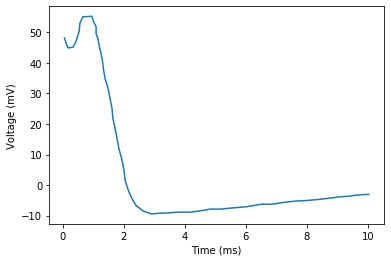

In [10]:
# Load in Data from ActionPotential1.mat
filepath = "ActionPotential1.mat"

data = loadmat(filepath)
t1 = np.squeeze(data["ActionPotential1Time"])
A1 = np.squeeze(data["ActionPotential1Voltage"])

plt.figure(), plt.plot(t1, A1)
plt.xlabel("Time (ms)"), plt.ylabel("Voltage (mV)")

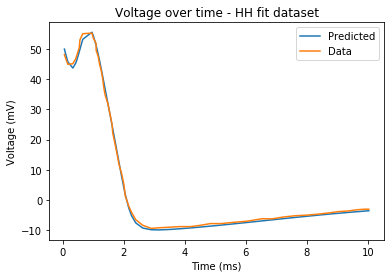

In [11]:
### GRADED 
# 2C - 4 pts (code)

### Start Code ###

def HHmodel2(t, gk, gna):
    
    V0 = 50
    n0 = 0.3176769140606974
    m0 = 0.05293248525724958
    h0 = 0.5961207535084603
    Iapp = 0
    
    def ODEs(y,t): 
        V, n, m, h = y[0], y[1], y[2], y[3] 
        an, am, ah, Bn, Bm, Bh = evaluateAlphaBeta(V)
        dvdt = -gk * (n**4) * (V + 12) - gna * (m**3)*h*(V - 115) - .3 * (V - 10.6) + Iapp
        dndt = an*(1 - n) - Bn*n
        dmdt = am*(1 - m) - Bm*m
        dhdt = ah*(1 - h) - Bh*h
        return dvdt, dndt, dmdt, dhdt

    y0 = [V0, n0, m0, h0]
    res = odeint(ODEs, y0, t)
    Vout = res[:,0]
    nout = res[:,1]
    mout = res[:,2]
    hout = res[:,3]
    
    return Vout

#Estimate gk and gna
popt,pcov = curve_fit(HHmodel2, t1, A1)
predicted = HHmodel2(t1, *popt)

#Plot 
plt.figure(1)
plt.plot(t1, predicted)
plt.plot(t1,A1)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("Voltage over time - HH fit dataset")
plt.legend(["Predicted", "Data"])

### End Code ###

### 2C - 2 pts (written)

This depicts a sodium channel blocker since the repolarization occurs so quickly (drops about 60mV in ~1ms) and the change in voltage is so drastic. If the potassium channel was blocked, the repolarization would be delayed. Peak voltage is also much lower than a normal action potential. This peak is created by the opening of the sodium channels, so this further supports that this is likely a sodium channel blocker. 

(Text(0.5, 0, 'Time (ms)'), Text(0, 0.5, 'Voltage (mV)'))

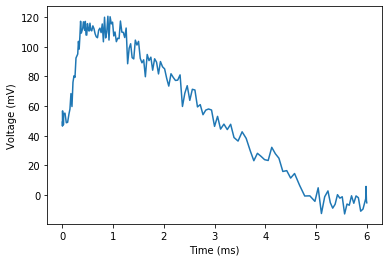

In [12]:
# Load in Data from ActionPotential2.mat
filepath = "ActionPotential2.mat"

data = loadmat(filepath)
t2 = np.squeeze(data["ActionPotential2Time"])
A2 = np.squeeze(data["ActionPotential2Voltage"])

plt.figure(), plt.plot(t2, A2)
plt.xlabel("Time (ms)"), plt.ylabel("Voltage (mV)")

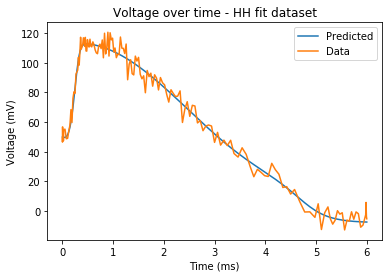

In [13]:
### GRADED 
# 2D - 3 pts (total)

### Start Code ###

#Estimate gk and gna
popt,pcov = curve_fit(HHmodel2, t2, A2)
predicted = HHmodel2(t2, *popt)

#Plot
plt.figure(1)
plt.plot(t2, predicted)
plt.plot(t2,A2)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("Voltage over time - HH fit dataset")
plt.legend(["Predicted", "Data"])

### End Code ###

### 2D - 2 pts (written)

The estimated parameter values match the data sufficiently well. The data has considerable noise whereas the prediced plot is able to define a steady path from that noise. This plot is representative of a potassium channel blocker since the repolarization is very delayed (takes several ms). Additionally, the peak voltage is higher than that found in normal action potentials, indicating that the sodium channel is left unchecked. These reasons support that this is likely a potassium channel blocker. 

### 2Ei - 2 pts (written)

Sodium channels have a role in many different functions. A sodium channel blocker without mechanistic speicificity would impact other sodium channels aside from the one of interest, leading to a variety of unintended consequences and inhibition of neuronal activity in other mechanisms. 

### 2Eii - 1 pt (written)

Bradycardia, seizures and blurry vision are a result of sodium channel blockers. The lack of specificity would cause these blockers to impact other body functions such as eyesight, heartbeat or brain function by slowing action potential and limiting depolarization so that they don't function correctly or that things don't function/act when they should (heartrate too slow, eyes unable to recognize what is being seen, etc). Several other body systems utilize sodium blockers. 

### 2Eiii - 3 pts (written)

Engineering response: Create an access pathway to direct the blockers to the appropriate location of intended treatment. A delivery mechanism or an attachment to another kind of cell that is specific to the desired location. 

Safety: Sodium is needed to initiate an action potential. A safety considerationg is to maintain some baseline concentration of sodium so that action potentials can still occur, otherwise no action potentials will be able to be generated at all. Additionally, there are many types of sodium receptors in the body, so the designed sodium blocker must not accidentally bind the wrong channel and should be highly accurate

##  Problem 3



### Constructing Synthetic Signals

Let's start by constructing three different signals, a mixed sinusoid, linear chirp, and square wave that we'll analyze later using fourier analysis. 

![title](imgs/Aeqs.png)

Fill in the functions below that take in a time vector t, along with the other required constants, and outputs the correct signal.

Hint: you may find [np.sign](https://numpy.org/doc/stable/reference/generated/numpy.sign.html) and [np.sin](https://numpy.org/doc/stable/reference/generated/numpy.sin.html) to be helpful

(Text(0.5, 1.0, 'Linear Chirp'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Amplitude'))

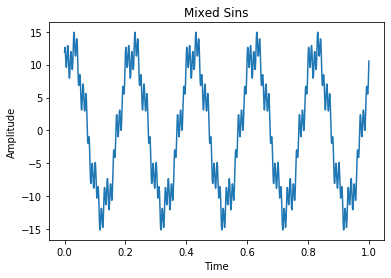

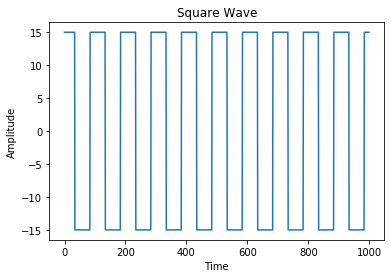

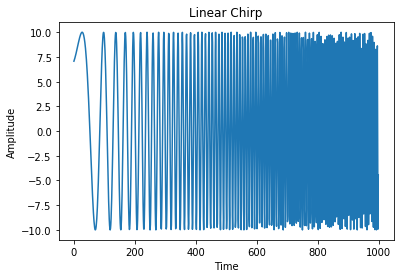

In [14]:
### Graded 
# 3A - 3 pts

### Start Code ###

def mixed_sins(time, amps, freqs, phases):
    mixedSinWave = 0 
    for i in range(len(amps)): 
        wave = amps[i]*np.sin(phases[i] + 2*np.pi*freqs[i]*time)
        mixedSinWave = mixedSinWave + wave
    
    return mixedSinWave


def linear_chirp(time, amp, f0, f1, T, phase):
    
    k = (f1 - f0)/T
    linearChirp = amp*np.sin(phase + 2*np.pi*(f0*time + (k*time**2)/2))
    
    return linearChirp


def square_wave(time, amp, freq, phase):
    
    squareWave = amp*np.sign(np.sin(phase + 2*np.pi*freq*time))
    
    return squareWave

### End Code ###

# sampling parameters
fs = 1000; # Hz sampling frequency at 1000 Hz to ensure full spectral coverage;
Ts = 1.0/fs # sample period
tf = 1.  # time span

# construct our time vector
time = np.linspace(0.0,tf-Ts,fs)


mixedSins = mixed_sins(time, [12, 2, 2], [5, 30, 100], [np.pi/4, np.pi/3, np.pi/3])
squareWave = square_wave(time, 15, 10, np.pi/3)
linearChirp = linear_chirp(time, 10, 2, 100, 0.5, np.pi/4)

plt.figure(1), plt.plot(time, mixedSins)
plt.title("Mixed Sins"), plt.xlabel("Time"), plt.ylabel("Amplitude")

plt.figure(2), plt.plot(squareWave)
plt.title("Square Wave"), plt.xlabel("Time"), plt.ylabel("Amplitude")

plt.figure(3), plt.plot(linearChirp)
plt.title("Linear Chirp"), plt.xlabel("Time"), plt.ylabel("Amplitude")

### Fourier Transforms

Having constructed our own signals, we are ready to analyze our signals in the frequency domain using fourier analysis. Any signal can be represented using a summation of sinusoids; the fourier transform calculates the amplitude and phase for each sinusoid that composes our signal. Here, we will be using the python functions [np.fft.fft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) and [np.fft.fftfreq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html) to identify the frequency spectrum (power vs. frequency) for our signals.

Fill in the function plotFFT, which takes in an input signal and the timestep (1 / sampling frequency) and returns the power and frequency values needed to plot the FFT. Make sure to normalize your power values by setting the norm parameter for np.fft.fft and to take the positive component of power and frequency by taking the absolute value. Then run the block of code below to plot the power spectrum for each of the signals you contructed in part 1A.

In [15]:
### Graded 
# 3B i - 2 pts

def plotFFT(signal, timestep):
    
    # Hint: you may find np.fft.fft, np.abs, np.sum, and np.fft.fftfreq to be helpful. 
    # Set norm = "ortho" for np.fft.fft and take the absolute value of power and frequency
    # in order to obtain positive magnitudes and frequencies
    ### Start Code ###
    
    freqs = np.abs(np.fft.fftfreq(len(signal), d = timestep))
    power = np.abs(np.fft.fft(signal, n=None, axis=-1, norm = "ortho"))
    
    ### End Code ###
    
    return freqs, power

(<Figure size 432x288 with 1 Axes>,
 (0, 200),
 Text(0.5, 1.0, 'Linear Chirp'),
 Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Amplitude (AU)'))

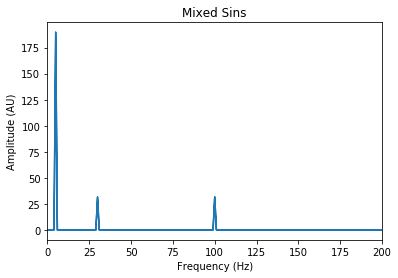

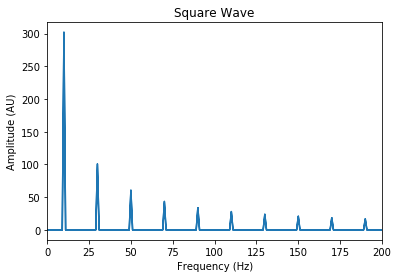

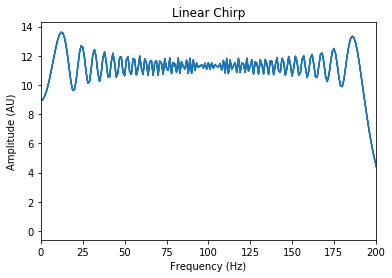

In [16]:
# Compute the FFT of each signal

freqs, power = plotFFT(mixedSins, Ts)
plt.figure(), plt.plot(freqs, power), plt.xlim([0, 200]), plt.title("Mixed Sins"), plt.xlabel("Frequency (Hz)"), plt.ylabel("Amplitude (AU)")

freqs, power = plotFFT(squareWave, Ts)
plt.figure(), plt.plot(freqs, power), plt.xlim([0, 200]), plt.title("Square Wave"), plt.xlabel("Frequency (Hz)"), plt.ylabel("Amplitude (AU)")

freqs, power = plotFFT(linearChirp, Ts)
plt.figure(), plt.plot(freqs, power), plt.xlim([0, 200]), plt.title("Linear Chirp"), plt.xlabel("Frequency (Hz)"), plt.ylabel("Amplitude (AU)")

### 3Bii - 1 pt (written)

The mixedsin signal could be compressed without data loss since the only change in activity occurs within a small range of frequencies. All of this data could be stored with 6 data points (3 amplitudes and 3 frequencies). 
It could also be completely retained with the use of a low pass filter. 

### 3Biii - 2 pts (written)

linear chirp: low pass - would preserve majority of the data points and the remainder of the data could be estimated since the data is symmetric. 

square wave: low pass - the activity that best reflects the data is at the beginning and the small peaks contribute very little to the overall function so it would not be much loss to eliminate them with a low pass function. The shape of the data is also well predicted with a function so it would be straightforward enough to predict the remaining data excluded from the filter. 

### 3Ci - 2 pts (written)

The QRS complex in electrocardiography (ECG): 0-20 Hz (https://www.sciencedirect.com/science/article/pii/S0898122107005019) 

Surface electromyography under muscle movement (EMG): 1-10 Hz (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3821366/)

Delta: 0 - 3 Hz (https://www.medicine.mcgill.ca/physio/vlab/biomed_signals/eeg_n.htm)

Theta: 3.5 - 7.5 Hz (https://www.medicine.mcgill.ca/physio/vlab/biomed_signals/eeg_n.htm)

Alpha: 7.5 - 13 Hz (https://www.medicine.mcgill.ca/physio/vlab/biomed_signals/eeg_n.htm)

Beta: 13.5 - 30 Hz (Juri D. Kropotov, in Functional Neuromarkers for Psychiatry, 2016

Gamma: 32+ Hz (Juri D. Kropotov, in Functional Neuromarkers for Psychiatry, 2016)


### 3Cii - 1 pt (written)

QRS complex overlaps with Delta(0-3Hz), Theta(3.5-7.5Hz), Alpha(7.5-13Hz), Beta(13.5-20Hz), and EMG(1-10Hz)
EMG overlaps with Delta(1-3Hz), Theta(3.5-7.5Hz), Alpha(7.5-10Hz) and QRS(1-10Hz)

##  Problem 4

Now that we've had some practice working with signals and FFT, let's use these tools towards a seizure-detection challenge!

### Load example data

Let's first start by loading in some examples that you can use to get familiarized with the data. In answering 4A, it may be helpful to write your own code to examine/plot the data and labels.

(640, 1)
[array(['ictal'], dtype='<U5')]
(640, 400)
-79.2125


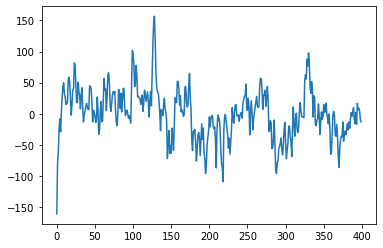

In [17]:
#folder = "./data/"

datapath = "small_data.mat"
data = loadmat(datapath)
X_example = np.asarray(data['X_raw'])
Y_example = np.asarray(data['Y'])

# In the section below, feel free to add code to examine the shape and 
# content of the data and labels
### Non-graded Code ###
print(Y_example.shape)
print(Y_example[0])

print(X_example.shape)
print(X_example[0][1])

plt.plot(X_example[0,:])


### 4Ai - 1 pt (written)

Sample = Xraw, an array of length 400

The raw features are each index(1-400) in Xraw, which all represent time points. 

The categories for our sample class labels are Ictal and Interictal. 


### Plotting examples of ictal and inter-ictal samples

Using X_example and Y_example along with the provided example indices (ictalInd and interictalInd), plot an example of an ictal sample and an inter-ictal sample. You do not need to include these plots in your write up, but you will need to comment on what sample features you might use to distinguish between the two classes (Hint: how might you use FFT?).

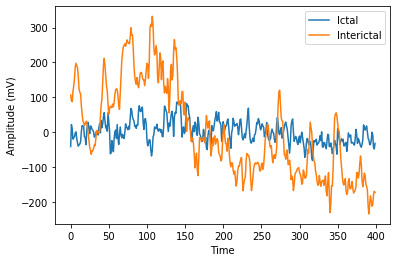

In [18]:
### GRADED
# 4A ii - 1 pt (code + written)

ictalInd = 16
interictalInd = - 50

### Start Code ###

plt.figure(1)
plt.plot(X_example[ictalInd,:])
plt.plot(X_example[interictalInd,:])
plt.xlabel("Time")
plt.ylabel("Amplitude (mV)")
plt.legend(["Ictal", "Interictal"])

### End Code ###

### 4Aii (written)

A difference you might calculate would be range (difference between max and min amplitupes, since Interictal has a range os ~500 whereas Ictal is less variant and has a range around 200.

### 4Aiii - 1 pt (written)

It is important to separate trainting and testing because the training data is how the model learns how to make the predictions and it has been trained to predict correctly on that data so we wold expect it to perform well. Test data should be used to ensure that the model works on data it hasnt seen before.

feel free to insert any drawings into the pdf after you've exported

### 4Aiv - 2 pt (written)

See two diagrams attached.
The use of nonbinary data would cause the linear classifier to fail. Since it relies on being able to sort into two categories, adding another grouping would not work with this type of classifier.

feel free to insert any drawings into the pdf after you've exported

### 4Av - 2 pt (written)

An ROC curve is a plot depicting the tradeoff between specificity and sensitivity in tests and helps to determine cutoffs for a test. 
The X axis is 1 - specificity and the y axis is sensitivity. Ideal test cutoffs maximize sensitivity(high true positive) and high specificity(low false positive). 
The AUC value is the area under the ROC curve and has a value of 1 for an ideal classifier, meaning it is able to completely distinguish between the classes without overlap. 


feel free to insert any drawings into the pdf after you've exported

### Calculating Spectral Features

We will now calculate 'spectral' features, based on the frequency domain components of our input data. You will be using your tools from Problem 3 in order to calculate the power and frequencies in the frequency spectrum of your input data. You will then find the average power in each of six frequency bands ([0,4], [4,8], [8,12], [12,30], [30,70], [70,180]) using your calculated power and frequency values.

Hints: 

- Remember to set the norm parameter of np.fft.fft to "ortho"

- When calculating the mean within each frequency band, make sure that your dimensions are correct and compatible

- Your output X_feat should be of shape (number of samples x 6)

In [19]:
### GRADED
# 4B - 4 pts

def spectralFeatures(X_raw):
    
    fs = 400
    
    # Use your FFT code from Problem 3 to calculate the power spectrum of your input signal
    # Remember to set the norm parameter of np.fft.fft to "ortho"
    ### Start Code ###
    power = np.abs(np.fft.fft(X_raw, norm = "ortho"))
    freqs = np.abs(np.fft.fftfreq(len(X_raw[0]), d = 1/fs))
    ### End Code ###
    
    freq_bands = [[0,4], [4,8], [8,12], [12,30], [30,70], [70,180]]
    
    ### Fill in X_spectral_feat by calculating the average power in each
    ### frequency band
    ### Start Code ###
    
    X_spectral_feat = []
    for i in range(len(X_raw)): 
        samp = X_raw[i]
        spec_feats = []
        for j in freq_bands: 
            band = power[i][j[0]:j[1]]
            spec_feats.append(np.average(band))
            
        X_spectral_feat.append(spec_feats)
            
    ### End Code ###
    return X_spectral_feat

### Building our Model

Now we are ready to build our SVM model. You will complete code in each of the steps below.

Here are some helpful functions we encourage you to use:

- Step 3: We've done this step for you! Examine the code to get a sense for how the formatting is performed.

- Step 4: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

- Step 5: [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Define your SVM with a linear kernel. Read the documentation and examples to see how you would define and train your SVM.

- Step 6: [metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html), and [metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

In [20]:
### GRADED
# 4C - 6 pts

def model(dataset_small = True):
    
    #############################################################################################################
    
    # Step 1 : 
        
    ### Create an optional input "dataset_small" in the model function header with a default value of True ###
    
    #############################################################################################################
    
    # Step 2: 
    #  - Calculate spectral features from X_raw and store in the matrix X_feat
    
    if dataset_small:
        data = loadmat("small_data.mat")
    else:
        data = loadmat("full_data.mat")
    X_raw = np.asarray(data['X_raw'])
    Y = np.asarray(data['Y'])
    
    ### Start Code ###

    X_feat = spectralFeatures(X_raw)
    X_feat = np.array(X_feat)
        
    ### End Code ###
        
    #############################################################################################################
    
    # Step 3: 
    #  - format labels to be an integer vector of 0s and 1s
    #  - normalize X_feat using StandardScaler 
    #  - (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    
    Y = (Y == 'ictal').astype(int)
    scaler = StandardScaler()
    X_feat = scaler.fit_transform(X_feat)
    
    #############################################################################################################

    # Step 4: 
    #  - split the data into training and test sets, use a 0.3 test_size
    
    X_train, X_test, y_train, y_test = train_test_split(X_feat, Y, test_size=0.3)
    
    #############################################################################################################

    # Step 5: 
    #  - define a linear SVM and train it on your training data
    #  - see documentation for svm.SVC   
    
    ### Define and train a linear SVM. Use a linear kernel on your training data and labels
    svmModel = svm.SVC(kernel ='linear')
    svmModel.fit(X_train, y_train)
    
    #############################################################################################################

    # Step 6: 
    #  - predict sample labels using your trained model
    #  - Calculate accuracy and AUC using your predicted and known labels
    #  - Plot the ROC curve
    #  - Hints: metrics.accuracy_score, metrics.roc_curve, and metrics.roc_auc_score
    
    y_pred = svmModel.predict(X_test)

    y_score = svmModel.decision_function(X_test)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)
    plt.plot(fpr,tpr)
    plt.ylabel("True Positive Ratio")
    plt.xlabel("False Positive Ratio")
    
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    
    print("AUC:", metrics.roc_auc_score(y_test,y_score))

Run the cells below to run your model (make sure to set the dataset variable), it may take 10-20 minutes to complete on the large dataset.

Accuracy: 0.9479166666666666
AUC: 0.9550342130987292


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


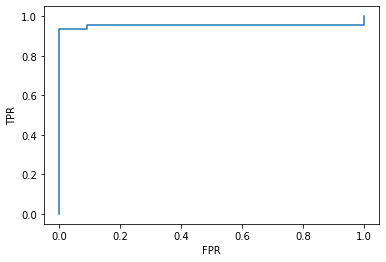

In [21]:
model(dataset_small= True)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9357308901955422
AUC: 0.7538258251331927


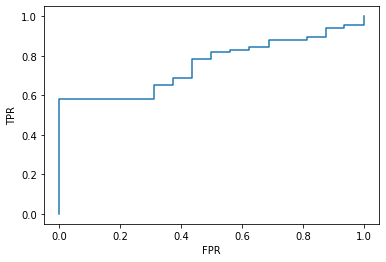

In [22]:
model(dataset_small= None)

### 4C (written)

Small dataset
Accuracy: 0.9479166666666666
AUC: 0.9550342130987292

Full dataset
Accuracy: 0.9357308901955422
AUC: 0.7538258251331927

### 4Di - 3 pts (written)

AUC may be better than accuracy in this context becuase accuracy is based off of a specific cutoff point, whereas AUC is based off of the whole picture/classification results. The cutoff point used to determine accuracy may not be the best point. Additionally, data with a lot of variability so the differences in class frequencies may make accuracy meaningless. This applies to this type of testing since the seizures are spontaneous and unpredictable and look different for every individual. A model might have high accuracy but low AUC if the accuracy cutoff is not correct or represented well in the model.

### 4Dii - 4 pts (written)

The model performed better on the small dataset than the full dataset since it has a low false positive rate and high true positive rate. 
This detector could be improved with better features to distinctly differntiate betwen seizures and nonseizures that could be revealed through closer analysis/understanding of the data. These features are ideally mutually exclusive to maximize their effectiveness in training the model. 
Too many features in the detector will compromise its capability as they will provide almost too much information, pulling the model in so many different directions that it will be difficult for it to correctly differentiate. 


### 4Diii - 3 pts (written)

In high sensitivity, the data will be close to the cutoff point and will be considered accurate (high true positive). While this is important, it may be accurate by the wrong standard (misguided cutoff point) and will not be appropriately reflective of the data. Specificity means high true negative rate, which often leads to false positives. This is the tradeoff, more true negatives, if it is prioritized over sensitivity will lead to more false positives in this scenario. In this case, I would prioritize specificity since in this scenario I would be more tolerant to false positives than false negatives, as an electrical stimulus on a patient not seizing will have little effect whereas a seizure left undetected and not treated can be more harmful. 